In [1]:
%load_ext autoreload
%autoreload 2

import time

import matplotlib.pyplot as plt
import numpy as np
from ase import Atoms

from potentials import ParameterizedPotential

In [3]:
N = 101
L = 5

box = np.array((L,) * 3)
atoms = Atoms('Ag', [box / 2], cell=box)
grid = (N,) * 3

lobato = ParameterizedPotential(atoms, grid, 'lobato')
kirkland = ParameterizedPotential(atoms, grid, 'kirkland')
peng = ParameterizedPotential(atoms, grid, 'peng')
weickenmeier = ParameterizedPotential(atoms, grid, 'weickenmeier')

_,_,z,_ = lobato.real_space_coordinates()

In [17]:
V_scattering = kirkland.calc_from_scattering()
V_splines = kirkland.calc_from_splines(r_min=.2,v_min=1e-4)

(0, 100000000000.0)

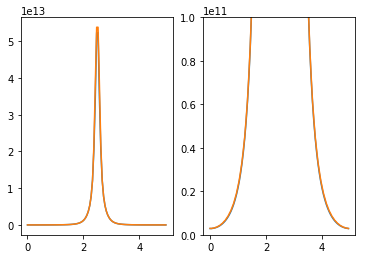

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(z[N//2,N//2,:], V_splines[N//2,N//2,:]*1e10)
ax1.plot(z[N//2,N//2,:], V_scattering[N//2,N//2,:]*1e10)
#ax1.set_ylim([0,2.5e4])
#ax1.set_xlim([L/2-1,L/2+1])

ax2.plot(z[N//2,N//2,:], V_splines[N//2,N//2,:]*1e10)
ax2.plot(z[N//2,N//2,:], V_scattering[N//2,N//2,:]*1e10)
ax2.set_ylim([0,1e11])
#ax2.set_xlim([L/2+1,L/2+2])